In [1]:
import sys
sys.path.append('/Users/rsingh/Oyla/Work/our_python_dev/')

from oyla.mvc.utils import rgb_depth_view_matching

In [2]:
import numpy as np
import scipy.io
import cv2

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
dir_path='/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/Oct 16 - RG visit Set 3/22_data_October_16_19_55_05/'

In [4]:
index = 41

In [5]:
rgb = scipy.io.loadmat(dir_path+'/data_c_'+str(index)+'.mat')

rgb = rgb['data'][0][4]

rgb = rgb_depth_view_matching(rgb)
_rgb = rgb.astype('float32')/255.0

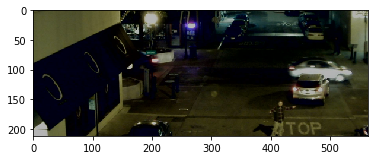

In [6]:
plt.imshow(rgb)

In [7]:
dist = np.fromfile(dir_path+'/imageDistance_c_'+str(index)+'.bin',np.uint16())
ampl = np.fromfile(dir_path+'/imageDistance_c_'+str(index)+'_ampl.bin',np.uint16())

dist = dist.reshape(120,160*2)
ampl = ampl.reshape(120,160*2)
print(np.max(ampl))

65500


In [8]:
no_data_indices = np.where(ampl>65000)
data_indices = np.where(ampl<65000)
print(data_indices[0].shape)
#dist[ampl>65000] = 0
print(np.max(ampl))
_ampl = ampl.copy()
_ampl = _ampl.astype('float32')/65500
print(np.max(ampl),np.min(ampl))
ampl[ampl>65000] = 1
c = np.max(ampl)
print(c)
ampl = ampl.astype('float32')/c
print(np.min(ampl),np.min(_ampl))
#_ampl[ampl>65000] = 65500
#_dist = dist.astype('float32')/30000


(5510,)
65500
65500 100
4505
0.00022197558 0.0015267176


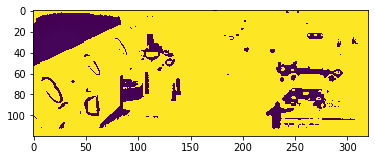

In [48]:
plt.imshow(_ampl)

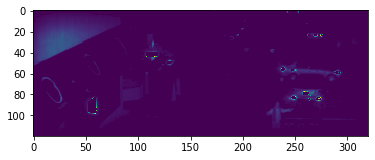

In [49]:
plt.imshow(ampl)

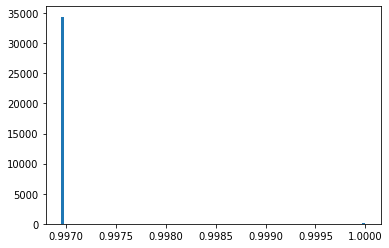

In [12]:
_=plt.hist(_ampl[dist==0],100)

In [31]:
print(np.max(dist[data_indices]),np.mean(dist[data_indices]),np.std(dist[data_indices]))
print(np.max(ampl[data_indices]),np.mean(ampl[data_indices]),np.std(ampl[data_indices]))

13723 4985.650444793302 1517.767929375115
0.08467692 0.0053228596 0.0054759383


In [118]:
median_filtered = cv2.medianBlur(rgb,5)
print(np.mean(np.abs(median_filtered-rgb)))

75.34932097734736


In [102]:
print(np.max(median_filtered[data_indices]),np.mean(median_filtered[data_indices]),np.std(median_filtered[data_indices]))

188 43.40943738656987 37.33753184392981


In [121]:
# bilateral_filtered = cv2.bilateralFilter(dist.astype('float32')/30000,-5,0.05,0.5)*30000
bilateral_filtered = cv2.bilateralFilter(rgb,-1,7,7.0)
#bilateral_filtered = bilateral_filtered.astype('int32')

print(np.mean(np.abs(bilateral_filtered-rgb)))

75.4397701341348


In [111]:
laplacian = cv2.Laplacian(rgb,cv2.CV_64F)
print(np.sqrt(np.mean(np.power(laplacian,2))))
print(np.sqrt(120*120+320*320)*2/100)

19.43449272377051
6.835202996254025


In [112]:
_laplacian = cv2.Laplacian(_rgb,cv2.CV_32F)
print(np.sqrt(np.mean(np.power(_laplacian,2))))
print(np.sqrt(120*120+320*320)*2/100)

0.0762137
6.835202996254025


In [113]:
sobelx = cv2.Sobel(_rgb,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(_rgb,cv2.CV_64F,0,1,ksize=5)

In [114]:
np.mean(np.sqrt(sobelx*sobelx+sobely*sobely))

2.1235830512942613

In [115]:
_bilateral_filtered = cv2.bilateralFilter(_rgb,-1,sigmaColor=0.062,sigmaSpace=7.0)

(-0.5, 564.5, 211.5, -0.5)

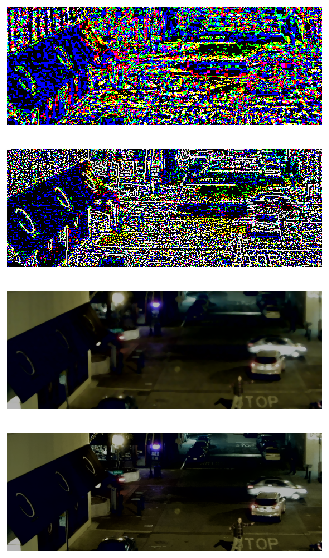

In [123]:
f, axs = plt.subplots(4,1,figsize=(10,10))
axs[0].imshow(np.abs(bilateral_filtered-rgb))
axs[0].axis('off')
axs[1].imshow(median_filtered-rgb)
axs[1].axis('off')
axs[2].imshow(median_filtered)
axs[2].axis('off')
axs[3].imshow(bilateral_filtered)
axs[3].axis('off')

In [20]:
print(np.mean(np.abs(bilateral_filtered.astype('float')-rgb.astype('float'))))

print(np.mean(np.abs(median_filtered.astype('float')-rgb.astype('float'))))
print(np.mean(np.abs(_bilateral_filtered-_rgb))*255)
print(10*np.log10(np.mean(np.power(_rgb,2))/np.mean(np.power(_bilateral_filtered-_rgb,2))))

1.7315550731897367
2.617373518116547
1.7391545651480556
27.729547023773193


In [21]:
for i in range(1):
    _bilateral_filtered = cv2.bilateralFilter(_rgb,-1,sigmaColor=0.1+i*0.2,sigmaSpace=1.0)  
    print(0.1+i*0.2,10*np.log10(np.mean(np.power(_rgb,2))/np.mean(np.power(_bilateral_filtered-_rgb,2))))

0.1 32.081003189086914


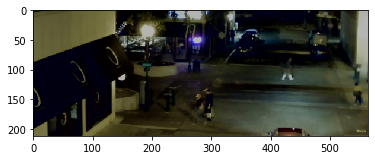

In [22]:
plt.imshow(_bilateral_filtered)

In [23]:
for i in range(1):
    _bilateral_filtered = cv2.bilateralFilter(_rgb,-1,sigmaColor=1.0,sigmaSpace=1.0+i*0.2)  
    print(1.0+i*0.2,10*np.log10(np.mean(np.power(_rgb,2))/np.mean(np.power(_bilateral_filtered-_rgb,2))))

1.0 24.089796543121338


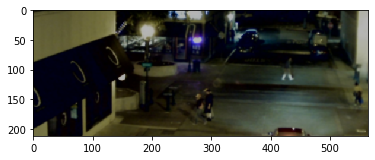

In [24]:
plt.imshow(_bilateral_filtered)

In [15]:
_laplacian = cv2.Laplacian(_ampl,cv2.CV_32F)
print((np.mean(np.abs(_laplacian))))
print(np.sqrt(120*120+320*320)*2/100)

0.14970726
6.835202996254025


In [23]:
laplacian = cv2.Laplacian(ampl,cv2.CV_32F)
print((np.mean(np.abs(_laplacian))))
print(np.sqrt(120*120+320*320)*2/100)

0.007981646
6.835202996254025


In [26]:
sobelx = cv2.Sobel(_dist,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(_dist,cv2.CV_64F,0,1,ksize=5)
np.mean(np.sqrt(sobelx*sobelx+sobely*sobely))

1.1309462502811392

In [28]:
_bilateral_filtered = cv2.bilateralFilter(_ampl,-1,sigmaColor=0.014*3,sigmaSpace=7.0)

In [65]:
y =[]
_y =[]
__y  = []
___y = []
for i in range(1):
    sigma =0.3+0.005*i
    ___y.append(sigma)
    _bilateral_filtered = cv2.bilateralFilter(_ampl,-1,sigmaColor=sigma,sigmaSpace=sigma)
    _a = (_ampl.copy()*65500).astype('uint16')
    _bf = (_bilateral_filtered.copy()*65500).astype('uint16')
    print(sigma,10*np.log10(np.mean(np.power(_ampl,2))/np.mean(np.power(_bilateral_filtered-_ampl,2))))
    y.append(10*np.log10(np.mean(np.power(_a,2))/np.mean(np.power(_bf-_a,2))))
    _y.append(10*np.log10(np.mean(np.power(_a[dist>0],2))/np.mean(np.power(_bf[dist>0]-_a[dist>0],2))))
    __y.append(10*np.log10(np.mean(np.power(_a[dist==0],2))/np.mean(np.power(_bf[dist==0]-_a[dist==0],2))))

0.3 95.97352027893066


In [74]:
np.mean(np.abs(_bilateral_filtered[dist==0]-_ampl[dist==0]))

1.3167969e-06

In [76]:
np.mean(np.abs(_bilateral_filtered[dist>0]-_ampl[dist>0]))

1.7676557e-05

In [75]:
np.mean(np.abs(bilateral_filtered[dist==0]-ampl[dist==0]))

1.3033548e-05

In [77]:
np.mean(np.abs(bilateral_filtered[dist>0]-ampl[dist>0]))

0.00015382543

In [19]:
_ampl[12:19,70:77]

array([[0.00221374, 0.00241221, 0.00248855, 0.00250382, 0.00216794,
        0.9969466 , 0.9969466 ],
       [0.00232061, 0.00251908, 0.00242748, 0.00215267, 0.00224427,
        0.9969466 , 0.9969466 ],
       [0.00264122, 0.00268702, 0.00238168, 0.0021374 , 0.00203053,
        0.9969466 , 0.9969466 ],
       [0.00250382, 0.00229008, 0.00154198, 0.9969466 , 0.9969466 ,
        0.9969466 , 0.9969466 ],
       [0.0018626 , 0.9969466 , 0.9969466 , 0.9969466 , 0.9969466 ,
        0.9969466 , 0.9969466 ],
       [0.9969466 , 0.9969466 , 0.9969466 , 0.9969466 , 0.9969466 ,
        0.9969466 , 0.9969466 ],
       [0.9969466 , 0.9969466 , 0.9969466 , 0.9969466 , 0.9969466 ,
        0.9969466 , 0.9969466 ]], dtype=float32)

In [20]:
ampl[12:19,70:77]

array([[0.00223077, 0.00243077, 0.00250769, 0.00252308, 0.00218462,
        1.        , 1.        ],
       [0.00233846, 0.00253846, 0.00244615, 0.00216923, 0.00226154,
        1.        , 1.        ],
       [0.00266154, 0.00270769, 0.0024    , 0.00215385, 0.00204615,
        1.        , 1.        ],
       [0.00252308, 0.00230769, 0.00155385, 1.        , 1.        ,
        1.        , 1.        ],
       [0.00187692, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ]], dtype=float32)

(-0.5, 319.5, 119.5, -0.5)

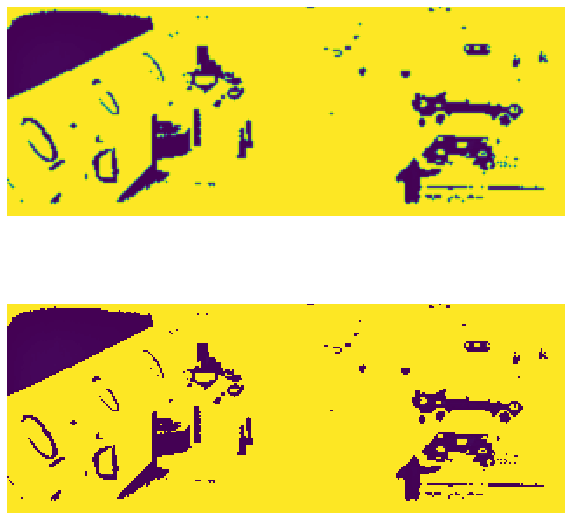

In [51]:
f, axs = plt.subplots(2,1,figsize=(10,10))
axs[0].imshow((_bilateral_filtered))
axs[0].axis('off')
axs[1].imshow(_ampl)
axs[1].axis('off')

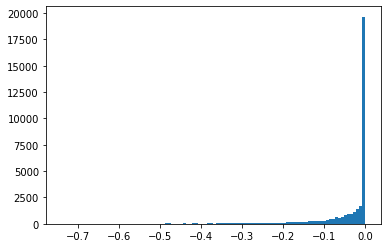

In [16]:
#_=plt.hist(_bilateral_filtered[dist==0],100)
_=plt.hist(_bilateral_filtered[dist==0]-_ampl[dist==0],100)

In [17]:
print(np.min(_bilateral_filtered[dist==0]-_ampl[dist==0]))
print(np.max(_bilateral_filtered[dist==0]-_ampl[dist==0]))

-0.74047756
6.556511e-07


In [18]:
print(np.min(_bilateral_filtered[dist>0]-_ampl[dist>0]))
print(np.max(_bilateral_filtered[dist>0]-_ampl[dist>0]))

-0.0017754016
0.9902843


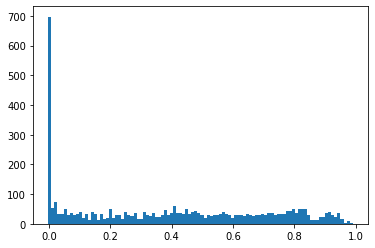

In [19]:
_=plt.hist(_bilateral_filtered[dist>0]-_ampl[dist>0],100)

In [205]:
bilateral_filtered = cv2.bilateralFilter(ampl,-1,sigmaColor=0.014*3,sigmaSpace=7.0)

In [45]:
np.max(_ampl)

1.0

In [64]:
x=[]
_x=[]
__x=[]
___x = []
for i in range(1):
    sigma =0.3+0.005*i
    ___x.append(sigma)
    bilateral_filtered = cv2.bilateralFilter(ampl,-1,sigmaColor=sigma,sigmaSpace=sigma)
    print(sigma,10*np.log10(np.mean(np.power(ampl,2))/np.mean(np.power(bilateral_filtered-ampl,2))))
    x.append(10*np.log10(np.mean(np.power(ampl,2))/np.mean(np.power(bilateral_filtered-ampl,2))))
    _x.append(10*np.log10(np.mean(np.power(ampl[dist>0],2))/np.mean(np.power(bilateral_filtered[dist>0]-ampl[dist>0],2))))
    __x.append(10*np.log10(np.mean(np.power(ampl[dist==0],2))/np.mean(np.power(bilateral_filtered[dist==0]-ampl[dist==0],2))))

0.3 51.23560905456543


In [62]:
np.unique(ampl[dist==0])

array([0.00022198], dtype=float32)

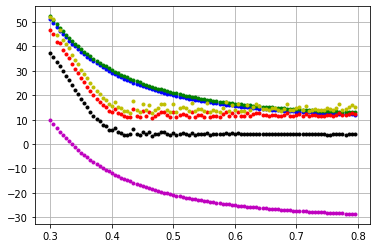

In [63]:
plt.plot(___x,x,'b.')
plt.plot(___x,_x,'g.')
plt.plot(___x,__x,'m.')
plt.plot(___y,y,'r.')
plt.plot(___y,_y,'k.')
plt.plot(___y,__y,'y.')
plt.grid('on')

(-0.5, 319.5, 119.5, -0.5)

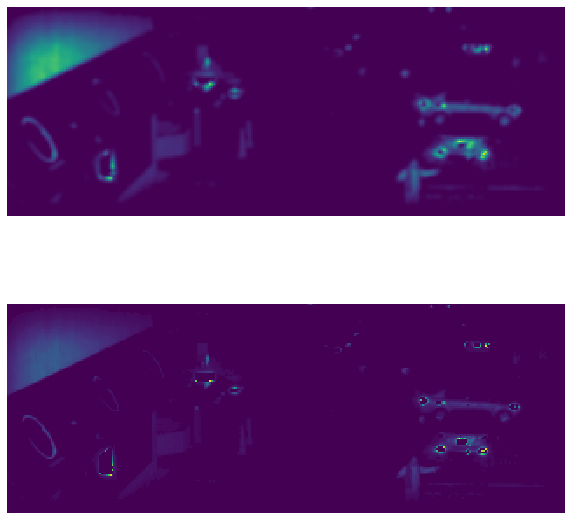

In [57]:
f, axs = plt.subplots(2,1,figsize=(10,10))
axs[0].imshow((bilateral_filtered))
axs[0].axis('off')
axs[1].imshow(ampl)
axs[1].axis('off')

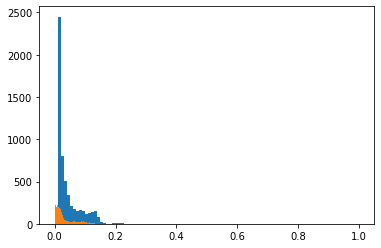

In [211]:
_=plt.hist(ampl[dist>0],100)
_=plt.hist(bilateral_filtered[dist>0],100)

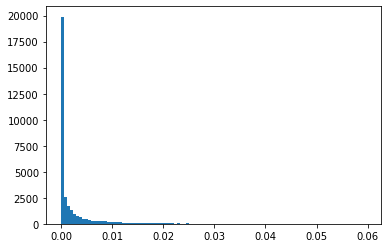

In [212]:
#_=plt.hist(_bilateral_filtered[dist==0],100)
_=plt.hist(bilateral_filtered[dist==0]-ampl[dist==0],100)

In [213]:
print(np.min(bilateral_filtered[dist==0]-ampl[dist==0]))
print(np.max(bilateral_filtered[dist==0]-ampl[dist==0]))

0.0
0.05956034


In [214]:
print(np.min(bilateral_filtered[dist>0]-ampl[dist>0]))
print(np.max(bilateral_filtered[dist>0]-ampl[dist>0]))

-0.97234195
0.049796756


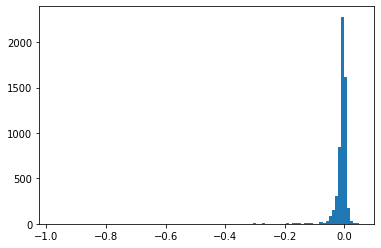

In [215]:
_=plt.hist(bilateral_filtered[dist>0]-ampl[dist>0],100)

In [47]:
_laplacian = cv2.Laplacian(_ampl,cv2.CV_32F)
print((np.mean(np.abs(_laplacian))))
print(np.sqrt(120*120+320*320)*2/100)

0.007675151
6.835202996254025


In [58]:
sobelx = cv2.Sobel(_ampl,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(_ampl,cv2.CV_64F,0,1,ksize=5)
np.mean(np.sqrt(sobelx*sobelx+sobely*sobely))

5.277998738798246e-05

In [78]:
_joint_filtered = cv2.ximgproc.jointBilateralFilter(joint = _ampl, 
                                                  src = _dist,
                                                  d = -1,
                                                  sigmaColor=1.22e-5,
                                                  sigmaSpace = 7)

NameError: name '_dist' is not defined

In [80]:
_guide_filtered = cv2.ximgproc.guidedFilter(guide=_ampl,
                                             src=_dist,
                                             radius=7,
                                             eps=5.27e-5)

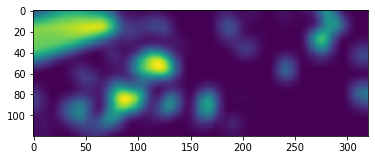

In [81]:
plt.imshow(guide_filtered)

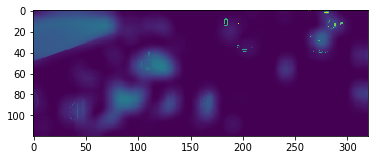

In [82]:
plt.imshow(_joint_filtered)

In [83]:
print(np.mean(np.abs(_bilateral_filtered-_dist)))
print(np.mean(np.abs(_joint_filtered-_dist)))

8.06833e-07
7.4682634e-07


rgb_ = cv2.imread('/Users/rsingh/Oyla Dropbox/Oyla/Share with Kunal/50lsb_Binning_Faster_data_October_07_21_16_46/kitti//2d/oyla_80.jpg')

bilateral_filtered = cv2.bilateralFilter(rgb_.astype('float32')/255,-1,100,15)*30000



TypeError: Invalid shape (212, 565, 3, 4) for image data

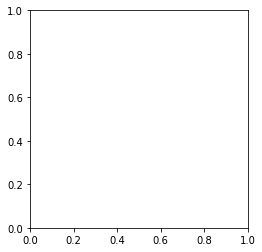

In [88]:
_bilateral_filtered = cm.get_cmap('jet_r')(bilateral_filtered)
_bilateral_filtered[no_data_indices] =  [135/255.0,0,175/255.0,255/255.0]
plt.imshow(_bilateral_filtered)


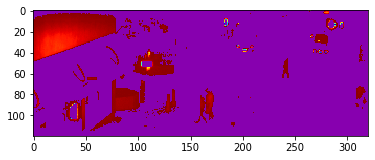

In [13]:
from matplotlib import cm
_ampl = cm.get_cmap('jet_r')(ampl)
_ampl[no_data_indices] =  [135/255.0,0,175/255.0,255/255.0]
plt.imshow(_ampl)

In [12]:
_median_filtered = cm.get_cmap('jet_r')(median_filtered)
_median_filtered[no_data_indices] =  [135/255.0,0,175/255.0,255/255.0]
plt.imshow(_median_filtered)

NameError: name 'cm' is not defined

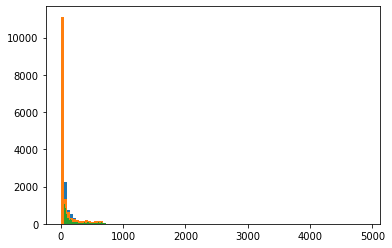

In [56]:
_=plt.hist(ampl[ampl>0],100)
_=plt.hist(bilateral_filtered[bilateral_filtered>0],100)
_=plt.hist(median_filtered[median_filtered>0],100)


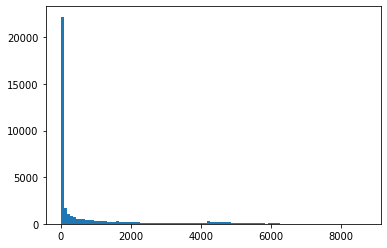

In [99]:
_=plt.hist(guide_filtered.reshape(-1),100)

In [100]:
print(np.max(guide_filtered),np.mean(guide_filtered),np.std(guide_filtered))

8689.517 827.2963 1535.1206


In [121]:
jointbilateral_filtered = cv2.ximgproc.jointBilateralFilter(joint=ampl.astype('float32')/np.max(ampl),
                                             src=dist.astype('float32')/30000,
                                             d=-5,sigmaColor=1.0,sigmaSpace=1.5)*30000

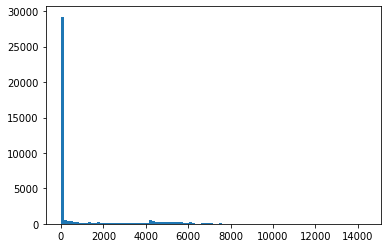

In [122]:
_=plt.hist(jointbilateral_filtered.reshape(-1),100)

In [103]:
print(np.max(jointbilateral_filtered),np.mean(jointbilateral_filtered),np.std(jointbilateral_filtered))

15145.0 826.9432 2033.4218


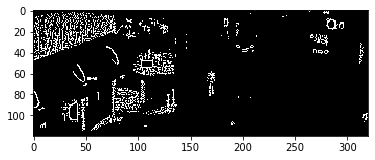

In [48]:
plt.imshow(median_filtered-ampl,'gray')

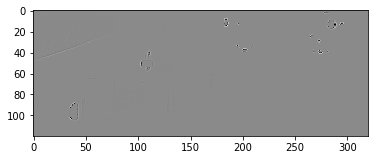

In [25]:
plt.imshow(bilateral_filtered-ampl,'gray')

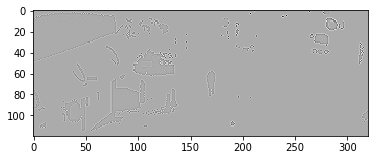

In [110]:
plt.imshow(jointbilateral_filtered-dist,'gray')

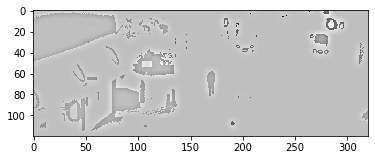

In [111]:
plt.imshow(guide_filtered-dist,'gray')

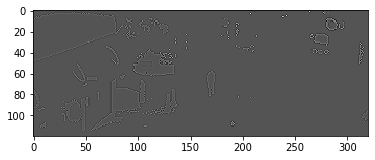

In [112]:
plt.imshow(bilateral_filtered-jointbilateral_filtered,'gray')
#is_gray = cv2.cvtColor(bilateral_filtered-jointbilateral_filtered,cv2.COLOR_RGB2GRAY)
#(thresh, im_bw) = cv2.threshold( (bilateral_filtered-jointbilateral_filtered),128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)


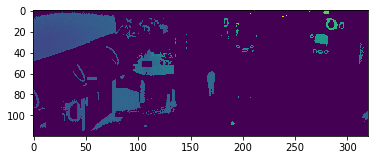

In [113]:
plt.imshow(dist)

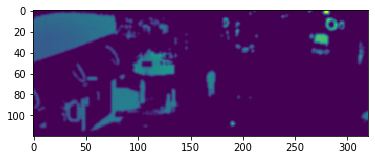

In [123]:
plt.imshow(jointbilateral_filtered)

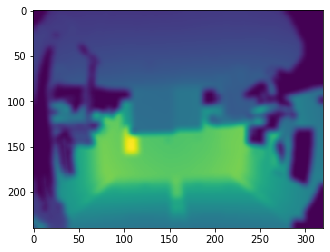

In [103]:
plt.imshow(guide_filtered)

In [104]:
whos

Variable                  Type        Data/Info
-----------------------------------------------
ampl                      ndarray     240x320: 76800 elems, type `uint16`, 153600 bytes (150.0 kb)
bilateral_filtered        ndarray     240x320: 76800 elems, type `float32`, 307200 bytes (300.0 kb)
cv2                       module      <module 'cv2.cv2' from '/<...>2.cpython-37m-darwin.so'>
dir_path                  str         /Users/rsingh/Downloads/D<...>data_October_11_18_36_49/
dist                      ndarray     240x320: 76800 elems, type `uint16`, 153600 bytes (150.0 kb)
filtered                  ndarray     240x320: 76800 elems, type `uint16`, 153600 bytes (150.0 kb)
guide_filtered            ndarray     240x320: 76800 elems, type `float32`, 307200 bytes (300.0 kb)
index                     int         20
jointbilateral_filtered   ndarray     240x320: 76800 elems, type `float32`, 307200 bytes (300.0 kb)
median_filtered           ndarray     240x320: 76800 elems, type `uint16`, 153

(array([2.7704e+04, 7.6700e+02, 4.9800e+02, 4.1200e+02, 3.5500e+02,
        3.6600e+02, 3.8700e+02, 3.1800e+02, 2.9600e+02, 1.9600e+02,
        2.3900e+02, 1.9800e+02, 1.9400e+02, 1.9700e+02, 2.0400e+02,
        2.1500e+02, 1.8200e+02, 1.4500e+02, 1.3300e+02, 1.0600e+02,
        1.2600e+02, 1.1000e+02, 1.3100e+02, 1.1600e+02, 1.2200e+02,
        1.1800e+02, 1.2500e+02, 1.3400e+02, 1.2500e+02, 9.0000e+01,
        4.0000e+02, 3.3000e+02, 3.1600e+02, 2.7900e+02, 2.5800e+02,
        2.9000e+02, 2.6500e+02, 2.4100e+02, 2.2300e+02, 1.7600e+02,
        1.8500e+02, 1.5800e+02, 1.0400e+02, 1.4800e+02, 2.6000e+02,
        2.9000e+01, 5.0000e+01, 4.3000e+01, 3.6000e+01, 3.1000e+01,
        4.2000e+01, 4.7000e+01, 2.6000e+01, 1.8000e+01, 3.6000e+01,
        1.4000e+01, 3.0000e+00, 1.0000e+00, 3.0000e+00, 3.0000e+00,
        3.0000e+00, 5.0000e+00, 8.0000e+00, 5.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00,
        3.0000e+00, 5.0000e+00, 9.0000e+00, 1.30

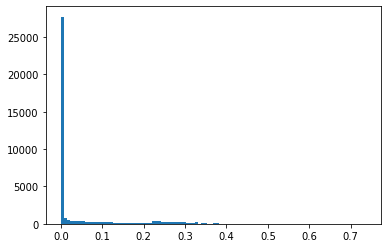

In [94]:
plt.hist(filtered.reshape(-1),100)

(array([3.3024e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        6.0000e+00, 6.5000e+01, 3.5100e+02, 3.8800e+02, 3.1800e+02,
        3.0500e+02, 3.1600e+02, 3.3700e+02, 2.8800e+02, 3.6500e+02,
        4.1300e+02, 4.2600e+02, 4.9400e+02, 2.4900e+02, 9.3000e+01,
        1.2300e+02, 1.0600e+02, 6.7000e+01, 3.1000e+01, 1.6000e+01,
        4.5000e+01, 9.1000e+01, 2.2000e+01, 9.0000e+00, 7.0000e+00,
        1.0000e+01, 2.4000e+01, 2.4000e+01, 3.9000e+01, 2.6000e+01,
        2.5000e+01, 1.5000e+01, 1.2000e+01, 2.7000e+01, 3.4000e+01,
        3.4000e+01, 2.2000e+01, 1.4000e+01, 1.2000e+01, 1.4000e+01,
        1.0000e+01, 6.0000e+00, 3.0000e+00, 1.0000e+00, 9.0000e+00,
        2.9000e+01, 1.4000e+01, 6.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

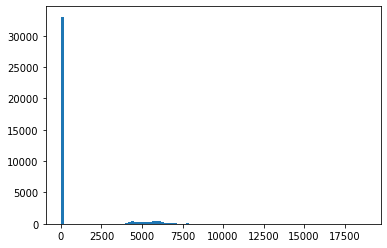

In [87]:
plt.hist(dist.reshape(-1),100)

In [106]:
np.max(np.abs(dist[:,1:] - dist[:,:-1]))

65535

In [102]:
dist[dist>30000]=0

In [104]:
np.max(dist)

18773

In [105]:
np.min(dist)

0

(array([3.5169e+04, 2.0800e+02, 1.2000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.3000e+01, 2.1000e+02, 2.6680e+03]),
 array([    0. ,  6553.5, 13107. , 19660.5, 26214. , 32767.5, 39321. ,
        45874.5, 52428. , 58981.5, 65535. ]),
 <a list of 10 Patch objects>)

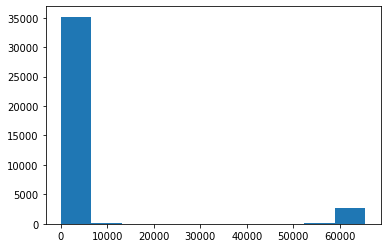

In [108]:
plt.hist(np.abs(dist[:,1:] - dist[:,:-1]).reshape(-1))

In [113]:
np.where(np.abs(dist[:,1:] - dist[:,:-1])==65535)

(array([ 7,  7, 19, 20, 20, 22, 26, 43, 67]),
 array([ 46,  65,  46,  21,  56,   8,  10,   5, 167]))

In [121]:
np.where(dist[7,1:]-dist[7,:319]==65535)

(array([46, 65]),)

In [126]:
dist[7,47]

5512

In [127]:
dist[7,46]

5513

In [41]:
img = cv2.imread('/Users/rsingh/Downloads/filter_input.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [65]:
filtered_img = cv2.bilateralFilter(img,15,80,80)

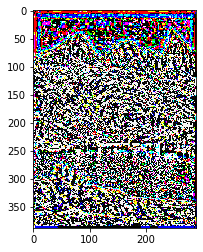

In [66]:
plt.imshow(filtered_img-img)

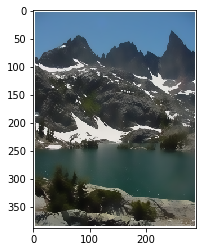

In [67]:
plt.imshow(filtered_img)

In [68]:
np.std(img)

61.266924834727895

In [69]:
filtered_img = cv2.medianBlur(img,15)

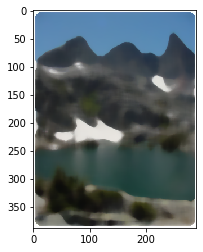

In [70]:
plt.imshow(filtered_img)

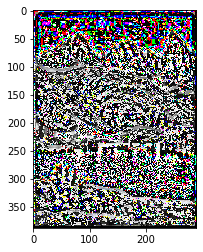

In [71]:
plt.imshow(filtered_img-img)

In [79]:
A = cv2.imread('/Users/rsingh/Downloads/carpet_01_noflash.jpg')
A = cv2.cvtColor(A,cv2.COLOR_BGR2RGB)
_A = A.astype('float32')/255.0

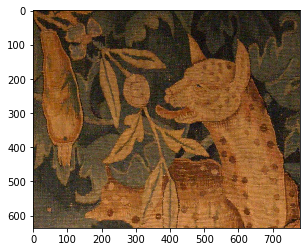

In [80]:
plt.imshow(A)

In [81]:
B = cv2.imread('/Users/rsingh/Downloads/carpet_00_flash.jpg')
B = cv2.cvtColor(B,cv2.COLOR_BGR2RGB)
B = cv2.resize(B,(A.shape[1],A.shape[0]))
_B = B.astype('float32')/255.0

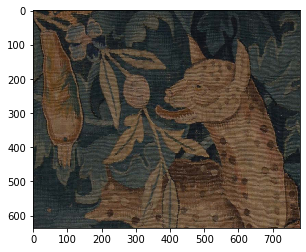

In [82]:
plt.imshow(B,cmap='gray')

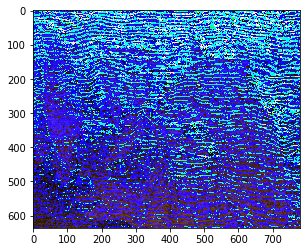

In [83]:
plt.imshow(A-B)

In [84]:
for i in range(1):
    C = cv2.bilateralFilter(A,d = -1,sigmaColor=74,sigmaSpace = 22)
    print(10+i*10,np.mean(A*A)/np.mean(np.power(C-A,2)))

10 1.7736574953225126


1.7736574953225126


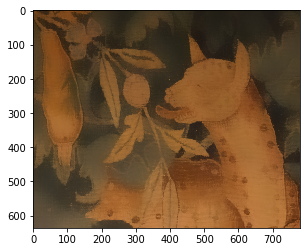

In [85]:
plt.imshow(C)
print(np.mean(A*A)/np.mean(np.power(C-A,2)))

In [86]:
for i in range(1):
    D = cv2.ximgproc.jointBilateralFilter(joint=B, src = A, d = -1, sigmaColor =8, sigmaSpace = 22)
    print(1+i*10,np.mean(A*A)/np.mean(np.power(D-A,2)))

1 1.7702084363372343


1.7702084363372343


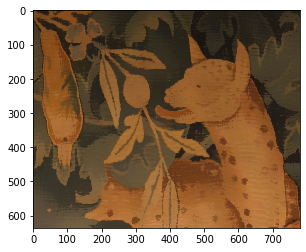

In [87]:
plt.imshow(D)
print(np.mean(A*A)/np.mean(np.power(D-A,2)))

In [88]:
E = cv2.ximgproc.guidedFilter(guide=B,src = A, radius= 18, eps=1)

1.715023133716868


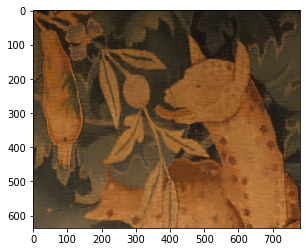

In [89]:
plt.imshow(E)
print(np.mean(A*A)/np.mean(np.power(E-A,2)))

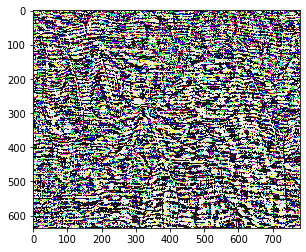

In [100]:
plt.imshow(E-A)

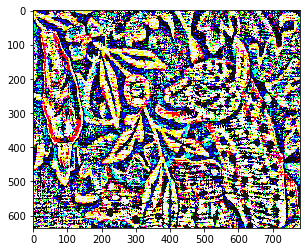

In [99]:
plt.imshow(C-A)

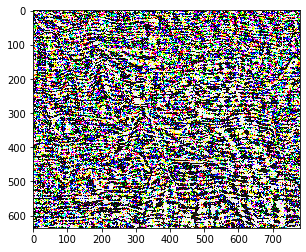

In [98]:
plt.imshow(D-A)

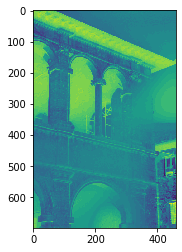

In [291]:
plt.imshow(E-B)

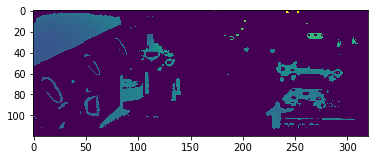

In [163]:
_dist = dist.astype('float32')/np.max(dist)
plt.imshow(_dist)


In [9]:
import pywt

In [182]:
coeff = pywt.wavedec2(_dist,'db5',level=3)

In [183]:
len(coeff)

4

In [185]:
coeff[3]

(array([[2.4103213e-03, 1.8096039e-04, 3.7703003e-06, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]], dtype=float32),
 array([[ 0.00125305,  0.00018096, -0.00868542, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.    

In [201]:
sigma = np.median(np.abs(coeff[2][2]))/0.06745
print(sigma)

0.05135734498589193


In [202]:
def bayes_shrink(c,sigma):
    v = np.power(c,2)
    v = np.sum(v)/np.prod(c.shape)
    print(v)
    sigmax = np.sqrt(np.max((v-sigma*sigma,0)))
    if sigmax:
        T = sigma*sigma/sigmax
    else:
        T = 0
    print(T)
    rc = np.sign(c)*np.max((np.abs(c)-T,np.zeros(c.shape)),axis=0)
    return rc

In [219]:
rc = []
for i in range(4):
    if i ==0 :
        c = coeff[i]
        rc.append(bayes_shrink(c,sigma))
    else:
        _rc = []
        for j in range(3):
            c = coeff[i][j]
            _rc.append(bayes_shrink(c,sigma))
        rc.append(_rc)

0.8531449869476849
0.0028600002893488133
0.09085498418752644
0.008880307062986483
0.042337310613931034
0.013237663311575991
0.018776817985844567
0.020761731640780167
0.017744224508911447
0.021459573111100475
0.01138668405301195
0.02819832163072872
0.005709957398801503
0.04758473191261292
0.004090376380013257
0.06919939343681461
0.0029785336881149108
0.14284184370632766
0.0015784422071968636
0


In [226]:
rc[1]

(array([[-0.        , -0.01308796, -0.        , ..., -0.        ,
         -0.        , -0.        ],
        [-0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.03743549, -0.14221406, -0.00902603, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.01012234,  0.01793089,  0.00296166, ...,  0.31124386,
          0.00276725,  0.00979699],
        [-0.22827205, -0.03427499, -0.22855665, ...,  0.1376067 ,
          0.        ,  0.        ]]),
 array([[-0.        ,  0.01768943, -0.04383883, ...,  0.        ,
         -0.        , -0.        ],
        [-0.00524574,  0.        , -0.10834838, ...,  0.        ,
          0.        ,  0.        ],
        [-0.        ,  0.        , -0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.01181949,  0.06021971, ..., -

In [225]:
rc[1] = tuple(rc[1])

In [220]:
A = pywt.waverec2(rc,'db5')

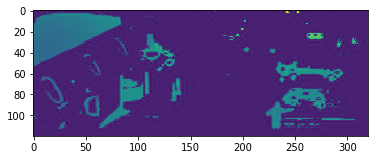

In [221]:
plt.imshow(A)

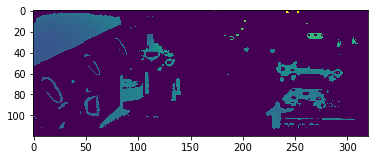

In [209]:
plt.imshow(_dist)

In [210]:
A.shape

(120, 320)

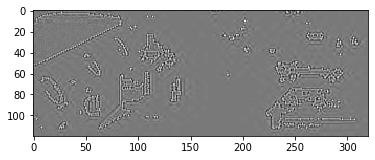

In [211]:
plt.imshow(_dist-A,cmap='gray')

In [159]:
np.mean(np.abs(rgb[:,:,0]-A[:,:565]))

0.0549213591565851

(array([1.000e+00, 6.000e+00, 7.040e+02, 2.523e+03, 1.788e+03, 3.760e+02,
        7.500e+01, 2.600e+01, 3.000e+00, 8.000e+00]),
 array([-0.01027651,  0.08577791,  0.18183233,  0.27788674,  0.37394116,
         0.46999558,  0.56605   ,  0.66210442,  0.75815884,  0.85421326,
         0.95026767]),
 <a list of 10 Patch objects>)

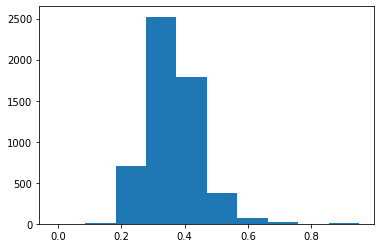

In [212]:
plt.hist(A[dist>0])

(array([1.000e+00, 0.000e+00, 1.082e+03, 2.006e+03, 2.144e+03, 1.440e+02,
        1.110e+02, 1.200e+01, 0.000e+00, 1.000e+01]),
 array([3.6231885e-04, 1.0032608e-01, 2.0028986e-01, 3.0025363e-01,
        4.0021738e-01, 5.0018114e-01, 6.0014492e-01, 7.0010871e-01,
        8.0007249e-01, 9.0003622e-01, 1.0000000e+00], dtype=float32),
 <a list of 10 Patch objects>)

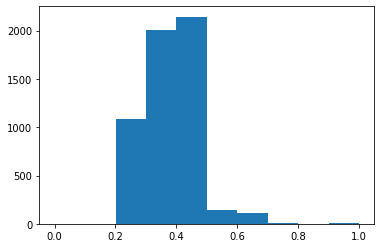

In [214]:
plt.hist(_dist[dist>0])